In [1]:
using Pkg;
Pkg.activate(".");
Pkg.instantiate();
using LinearAlgebra, DataFrames, Plots, StatsPlots, LaTeXStrings; pyplot();
using Random, PyCall, Statistics, StatsBase, MLDataUtils;
using JLD;
include("nntutorial.jl");

 Activating environment at `~/Documents/GitHub/NNtutorial/Project.toml`
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1278
┌ Warning: Module PlotUtils with build ID 21647897162395 is missing from the cache.
│ This may mean PlotUtils [995b91a9-d308-5afd-9ec6-746e21dbc043] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1017
┌ Warning: The call to compilecache failed to create a usable precompiled cache file for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
│   exception = ErrorException("Required dependency PlotUtils [995b91a9-d308-5afd-9ec6-746e21dbc043] failed to load from a cache file.")
└ @ Base loading.jl:1042
┌ Info: Precompiling StatsPlots [f3b207a7-027a-5e70-b257-86293d7955fd]
└ @ Base loading.jl:1278
┌ Warning: Module Plots with build ID 21716541054915 is missing from the cache.
│ This may mean Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80] does not support precompilation but is imported by a module

In [2]:
mnist_data = load("mnist_data.jld");

In [3]:
images = mnist_data["jl_images"];
targets = mnist_data["jl_targets"];
data = mnist_data["jl_data"];

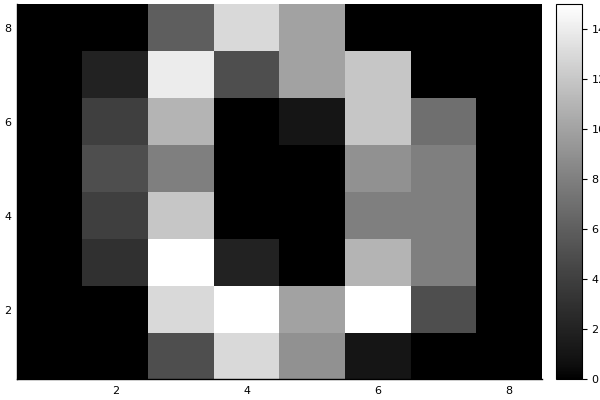

In [4]:
# visualization 
heatmap(images[1,:,:], color = :greys)

In [5]:
# normalize the data
X = standardize(ZScoreTransform, data, dims=1);
function remove_nans(x)
    if isnan(x)
        return 0.0
    else 
        return x
    end
end
X = remove_nans.(X);

In [6]:
# split the data
(x_train,y_train), (x_test,y_test) = splitobs((X', targets), at = 0.6);

In [7]:
yvtrain = nntutorial.convertytovect(y_train);
yvtest = nntutorial.convertytovect(y_test);

In [8]:
nn_structure = (64,30,10);

In [9]:
W, b, avg_cost_func = nntutorial.train_nn(nn_structure, x_train', yvtrain);

Starting gradient descent for 3000 iterations.
Iteration 0 of 3000 iterations.
Iteration 1000 of 3000 iterations.
Iteration 2000 of 3000 iterations.


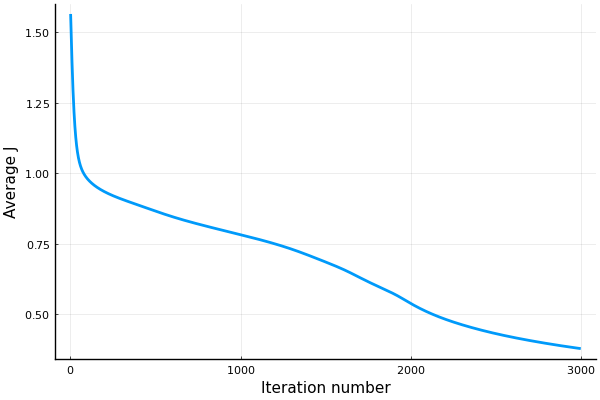

In [10]:
plot(avg_cost_func,legend=false,lw=2)
xlabel!("Iteration number")
ylabel!("Average J")

In [11]:
y_pred = nntutorial.predict_y(W,b,x_test',3);

In [12]:
skmets = pyimport("sklearn.metrics"); # import metrics from python

In [13]:
score = skmets.accuracy_score(y_test,y_pred .- 1)*100 # score

76.91237830319889